In [ ]:
# # 라이브러리 설치
# pip install pycaret
# pip install xgboost
# pip install lightgbm
# pip install catboost

In [10]:
import xgboost
import lightgbm
import catboost


In [13]:
from pycaret.datasets import get_data
from pycaret.classification import *

In [137]:
import pandas as pd

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sub = pd.read_csv("/content/gender_submission.csv")

In [12]:
print(train.shape)
print(test.shape)
print(sub.shape)

(891, 12)
(418, 11)
(418, 2)


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [119]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [138]:
# train 나이 결측치 처리
median_age = train['Age'].median(axis=0)
train['Age'].fillna(median_age, inplace=True)

# test 나이 결측치 처리
median_age = test['Age'].median(axis=0)
test['Age'].fillna(median_age, inplace=True)

In [139]:
# 성별 처리
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [140]:
# Embarked 처리
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [141]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [126]:
# 필요없는 열 지우기
train = train.drop(['PassengerId','Name','Ticket','Fare', 'Cabin'], axis=1)
test = test.drop(['PassengerId','Name','Ticket','Fare', 'Cabin'], axis=1)

In [142]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [143]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [144]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8378,0.8662,0.7364,0.8256,0.7777,0.6506,0.6541,0.3880
catboost,CatBoost Classifier,0.8330,0.8635,0.7281,0.8193,0.7702,0.6397,0.6432,0.2100
gbc,Gradient Boosting Classifier,0.8234,0.8603,0.7321,0.7968,0.7612,0.6215,0.6247,0.3900
lightgbm,Light Gradient Boosting Machine,0.8185,0.8635,0.7281,0.7901,0.7554,0.6118,0.6152,0.3060
xgboost,Extreme Gradient Boosting,0.8057,0.8565,0.7239,0.7618,0.7413,0.5859,0.5875,0.3460
et,Extra Trees Classifier,0.8025,0.8521,0.6987,0.7695,0.7318,0.5761,0.5783,0.3990
ada,Ada Boost Classifier,0.7994,0.8204,0.7159,0.7511,0.7311,0.5717,0.5741,0.4560
lr,Logistic Regression,0.7978,0.8525,0.6944,0.7617,0.7253,0.5659,0.5685,0.2140
ridge,Ridge Classifier,0.7976,0.0000,0.6946,0.7638,0.7262,0.5662,0.5691,0.2050
lda,Linear Discriminant Analysis,0.7976,0.8533,0.6946,0.7638,0.7262,0.5662,0.5691,0.2070


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [145]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.8499,0.7917,0.8636,0.8261,0.7264,0.7281
1,0.8571,0.9071,0.7500,0.8571,0.8000,0.6897,0.6934
2,0.8095,0.8371,0.7083,0.7727,0.7391,0.5896,0.5910
3,0.8548,0.9064,0.7391,0.8500,0.7907,0.6804,0.6843
4,0.8387,0.8465,0.7083,0.8500,0.7727,0.6493,0.6558
5,0.8226,0.8810,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.7581,0.7884,0.6667,0.6957,0.6809,0.4862,0.4865
7,0.8871,0.9024,0.7500,0.9474,0.8372,0.7526,0.7646
8,0.8387,0.8920,0.7500,0.8182,0.7826,0.6548,0.6564


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [102]:
# 튜닝
tuned = tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8098,0.6667,0.8421,0.7442,0.6144,0.6240
1,0.8254,0.8846,0.7083,0.8095,0.7556,0.6207,0.6240
2,0.8254,0.8568,0.6667,0.8421,0.7442,0.6144,0.6240
3,0.8226,0.9142,0.6522,0.8333,0.7317,0.6021,0.6122
4,0.7742,0.8695,0.6250,0.7500,0.6818,0.5090,0.5141
5,0.8710,0.9057,0.7500,0.9000,0.8182,0.7195,0.7266
6,0.7258,0.7851,0.5417,0.6842,0.6047,0.3991,0.4055
7,0.8548,0.8575,0.7083,0.8947,0.7907,0.6819,0.6928
8,0.8065,0.8827,0.6250,0.8333,0.7143,0.5724,0.5860


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [158]:
# 모델 예측
pred = predict_model(rf_model, data=test)
pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0,0.63
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,0,0.68
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0,0.65
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,0.58
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,0,0.58


In [159]:
save_model(rf_model, 'rf_model_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['PassengerId', 'Pclass', 'Age',
                                              'SibSp', 'Parch', 'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='median',
                                                               verbose='deprecated'))),
                 ('categorical_impute...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
              

In [160]:
loaded_model = load_model('rf_model_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [161]:
evaluate_model(loaded_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [166]:
sub['Survived'] = pred['prediction_score'].astype(int)
sub.to_csv('submission_pycaret02.csv', index=False)

In [174]:
import numpy as np

sub['Survived'] = np.where(pred['prediction_score'] > 0.6, 1, 0)

In [175]:
sub

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,1
416,1308,0


In [164]:
import os
files = os.listdir()
print("파일 유무 확인 : ", "submission_pycaret01.csv" in files)

파일 유무 확인 :  True


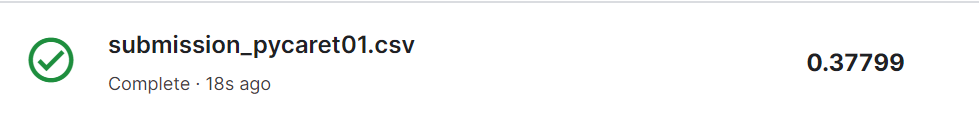

In [176]:
import os
files = os.listdir()
print("파일 유무 확인 : ", "submission_pycaret02.csv" in files)

파일 유무 확인 :  True


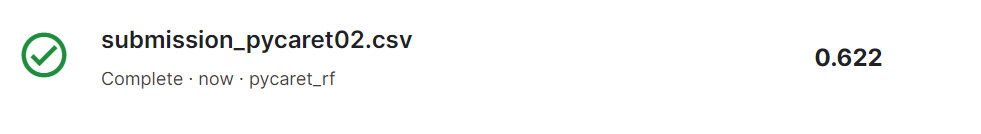